Lambda School Data Science, Unit 2: Predictive Modeling

# Kaggle Challenge, Module 3


## Assignment
- [ ] [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2), then submit your dataset.
- [ ] Continue to participate in our Kaggle challenge. 
- [ ] Use scikit-learn for hyperparameter optimization with RandomizedSearchCV.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.

## Stretch Goals

### Reading
- Jake VanderPlas, [Python Data Science Handbook, Chapter 5.3](https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html), Hyperparameters and Model Validation
- Jake VanderPlas, [Statistics for Hackers](https://speakerdeck.com/jakevdp/statistics-for-hackers?slide=107)
- Ron Zacharski, [A Programmer's Guide to Data Mining, Chapter 5](http://guidetodatamining.com/chapter5/), 10-fold cross validation
- Sebastian Raschka, [A Basic Pipeline and Grid Search Setup](https://github.com/rasbt/python-machine-learning-book/blob/master/code/bonus/svm_iris_pipeline_and_gridsearch.ipynb)
- Peter Worcester, [A Comparison of Grid Search and Randomized Search Using Scikit Learn](https://blog.usejournal.com/a-comparison-of-grid-search-and-randomized-search-using-scikit-learn-29823179bc85)

### Doing
- In additon to `RandomizedSearchCV`, scikit-learn has [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). Another library called scikit-optimize has [`BayesSearchCV`](https://scikit-optimize.github.io/notebooks/sklearn-gridsearchcv-replacement.html). Experiment with these alternatives.
- _[Introduction to Machine Learning with Python](http://shop.oreilly.com/product/0636920030515.do)_ discusses options for "Grid-Searching Which Model To Use" in Chapter 6:

> You can even go further in combining GridSearchCV and Pipeline: it is also possible to search over the actual steps being performed in the pipeline (say whether to use StandardScaler or MinMaxScaler). This leads to an even bigger search space and should be considered carefully. Trying all possible solutions is usually not a viable machine learning strategy. However, here is an example comparing a RandomForestClassifier and an SVC ...

The example is shown in [the accompanying notebook](https://github.com/amueller/introduction_to_ml_with_python/blob/master/06-algorithm-chains-and-pipelines.ipynb), code cells 35-37. Could you apply this concept to your own pipelines?


### More Categorical Encodings

**1.** The article **[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)** mentions 4 encodings:

- **"Categorical Encoding":** This means using the raw categorical values as-is, not encoded. Scikit-learn doesn't support this, but some tree algorithm implementations do. For example, [Catboost](https://catboost.ai/), or R's [rpart](https://cran.r-project.org/web/packages/rpart/index.html) package.
- **Numeric Encoding:** Synonymous with Label Encoding, or "Ordinal" Encoding with random order. We can use [category_encoders.OrdinalEncoder](https://contrib.scikit-learn.org/categorical-encoding/ordinal.html).
- **One-Hot Encoding:** We can use [category_encoders.OneHotEncoder](http://contrib.scikit-learn.org/categorical-encoding/onehot.html).
- **Binary Encoding:** We can use [category_encoders.BinaryEncoder](http://contrib.scikit-learn.org/categorical-encoding/binary.html).


**2.** The short video 
**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)** introduces an interesting idea: use both X _and_ y to encode categoricals.

Category Encoders has multiple implementations of this general concept:

- [CatBoost Encoder](http://contrib.scikit-learn.org/categorical-encoding/catboost.html)
- [James-Stein Encoder](http://contrib.scikit-learn.org/categorical-encoding/jamesstein.html)
- [Leave One Out](http://contrib.scikit-learn.org/categorical-encoding/leaveoneout.html)
- [M-estimate](http://contrib.scikit-learn.org/categorical-encoding/mestimate.html)
- [Target Encoder](http://contrib.scikit-learn.org/categorical-encoding/targetencoder.html)
- [Weight of Evidence](http://contrib.scikit-learn.org/categorical-encoding/woe.html)

Category Encoder's mean encoding implementations work for regression problems or binary classification problems. 

For multi-class classification problems, you will need to temporarily reformulate it as binary classification. For example:

```python
encoder = ce.TargetEncoder(min_samples_leaf=..., smoothing=...) # Both parameters > 1 to avoid overfitting
X_train_encoded = encoder.fit_transform(X_train, y_train=='functional')
X_val_encoded = encoder.transform(X_train, y_val=='functional')
```

**3.** The **[dirty_cat](https://dirty-cat.github.io/stable/)** library has a Target Encoder implementation that works with multi-class classification.

```python
 dirty_cat.TargetEncoder(clf_type='multiclass-clf')
```
It also implements an interesting idea called ["Similarity Encoder" for dirty categories](https://www.slideshare.net/GaelVaroquaux/machine-learning-on-non-curated-data-154905090).

However, it seems like dirty_cat doesn't handle missing values or unknown categories as well as category_encoders does. And you may need to use it with one column at a time, instead of with your whole dataframe.

**4. [Embeddings](https://www.kaggle.com/learn/embeddings)** can work well with sparse / high cardinality categoricals.

_**I hope it’s not too frustrating or confusing that there’s not one “canonical” way to encode categorcals. It’s an active area of research and experimentation! Maybe you can make your own contributions!**_

### BONUS: Stacking!

Here's some code you can use to "stack" multiple submissions, which is another form of ensembling:

```python
import pandas as pd

# Filenames of your submissions you want to ensemble
files = ['submission-01.csv', 'submission-02.csv', 'submission-03.csv']

target = 'status_group'
submissions = (pd.read_csv(file)[[target]] for file in files)
ensemble = pd.concat(submissions, axis='columns')
majority_vote = ensemble.mode(axis='columns')[0]

sample_submission = pd.read_csv('sample_submission.csv')
submission = sample_submission.copy()
submission[target] = majority_vote
submission.to_csv('my-ultimate-ensemble-submission.csv', index=False)
```

In [9]:
import os, sys
in_colab = 'google.colab' in sys.modules

# If you're in Colab...
if in_colab:
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge.git
    !git pull origin master
    
    # Install required python packages
    !pip install -r requirements.txt
    
    # Change into directory for module
    os.chdir('module3')

In [10]:
import pandas as pd

# Merge train_features.csv & train_labels.csv
train = pd.merge(pd.read_csv('../data/tanzania/train_features.csv'), 
                 pd.read_csv('../data/tanzania/train_labels.csv'))

# Read test_features.csv & sample_submission.csv
test = pd.read_csv('../data/tanzania/test_features.csv')
sample_submission = pd.read_csv('../data/tanzania/sample_submission.csv')

In [12]:
from sklearn.model_selection import train_test_split
train, validate = train_test_split(train)

In [13]:
from sklearn.model_selection import RandomizedSearchCV

%matplotlib inline
import matplotlib.pyplot as plt
from ipywidgets import interact
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import numpy as np
import category_encoders as ce

def getXandY(df):
  X=df.drop(columns=['id','status_group']).copy()
  X.date_recorded=pd.to_datetime(X.date_recorded, infer_datetime_format=True)
  X.latitude=X.latitude.replace(-2e-08,0)
  cols_with_zeros=['longitude','latitude','construction_year','population']
  for col in cols_with_zeros:
    X[col]=X[col].replace(0,np.nan)
    X[col+'_MISSING']=X[col].copy().isnull()
  X=X.drop(columns=['quantity_group',"payment_type"])
  X=X.drop(columns="recorded_by")
  X['year_recorded'] = X['date_recorded'].dt.year
  X['month_recorded'] = X['date_recorded'].dt.month
  X['day_recorded'] = X['date_recorded'].dt.day
  
  X['Yrs_before_inspection']=X.date_recorded.dt.year-X.construction_year
  X['yrs_before_inspection_MISSING']=X.Yrs_before_inspection.isnull()
  X = X.drop(columns='date_recorded')
  return X, df.status_group.copy()





def getX(df):
  X=df.drop(columns=['id']).copy()
  X.date_recorded=pd.to_datetime(X.date_recorded, infer_datetime_format=True)
  X.latitude=X.latitude.replace(-2e-08,0)
  cols_with_zeros=['longitude','latitude','construction_year','population']
  for col in cols_with_zeros:
    X[col]=X[col].replace(0,np.nan)
    X[col+'_MISSING']=X[col].copy().isnull()
  X=X.drop(columns=['quantity_group',"payment_type"])
  X=X.drop(columns="recorded_by")
  X['year_recorded'] = X['date_recorded'].dt.year
  X['month_recorded'] = X['date_recorded'].dt.month
  X['day_recorded'] = X['date_recorded'].dt.day
  
  X['Yrs_before_inspection']=X.date_recorded.dt.year-X.construction_year
  X['yrs_before_inspection_MISSING']=X.Yrs_before_inspection.isnull()
  X = X.drop(columns='date_recorded')
  return X



In [14]:
train_x, train_y = getXandY(train)
val_x, val_y=getXandY(validate)
test_x=getX(test)

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

numeric_target=train_y.replace({'non functional':0,
                              'functional needs repair':1,
                              'functional':2})
# train_x['numeric_target']=numeric_target
# target='numeric_target'

pipeline=make_pipeline(

    ce.OrdinalEncoder(),
    SimpleImputer(),
    StandardScaler(),
    SelectKBest(f_regression),
    RandomForestClassifier()
)

scores=cross_val_score(pipeline, train_x, numeric_target, cv=5, scoring='accuracy')


/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/jesse/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/jesse/anaconda3/lib/python3.7/site-package

In [18]:
print(f'Accuracy for 5 folds: {scores}')

Accuracy for 5 folds: [0.7567052  0.72382449 0.73459769 0.73487485 0.73484508]




The coverage_error function computes the average number of labels that have to be included in the final prediction such that all true labels are predicted. This is useful if you want to know how many top-scored-labels you have to predict in average without missing any true one. The best value of this metrics is thus the average number of true labels.

Note

Our implementation’s score is 1 greater than the one given in Tsoumakas et al., 2010. This extends it to handle the degenerate case in which an instance has 0 true labels.

Formally, given a binary indicator matrix of the ground truth labels
and the score associated with each label

, the coverage is defined as

with

. Given the rank definition, ties in y_scores are broken by giving the maximal rank that would have been assigned to all tied values.

Here is a small example of usage of this function:
>>>

>>> import numpy as np
>>> from sklearn.metrics import coverage_error
>>> y_true = np.array([[1, 0, 0], [0, 0, 1]])
>>> y_score = np.array([[0.75, 0.5, 1], [1, 0.2, 0.1]])
>>> coverage_error(y_true, y_score)
2.5

3.3.3.2. Label ranking average precision

The label_ranking_average_precision_score function implements label ranking average precision (LRAP). This metric is linked to the average_precision_score function, but is based on the notion of label ranking instead of precision and recall.

Label ranking average precision (LRAP) averages over the samples the answer to the following question: for each ground truth label, what fraction of higher-ranked labels were true labels? This performance measure will be higher if you are able to give better rank to the labels associated with each sample. The obtained score is always strictly greater than 0, and the best value is 1. If there is exactly one relevant label per sample, label ranking average precision is equivalent to the mean reciprocal rank.

Formally, given a binary indicator matrix of the ground truth labels
and the score associated with each label

, the average precision is defined as

where
, , computes the cardinality of the set (i.e., the number of elements in the set), and is the “norm” (which

The coverage_error function computes the average number of labels that have to be included in the final prediction such that all true labels are predicted. This is useful if you want to know how many top-scored-labels you have to predict in average without missing any true one. The best value of this metrics is thus the average number of true labels.

Note

Our implementation’s score is 1 greater than the one given in Tsoumakas et al., 2010. This extends it to handle the degenerate case in which an instance has 0 true labels.

Formally, given a binary indicator matrix of the ground truth labels
and the score associated with each label

, the coverage is defined as

with

. Given the rank definition, ties in y_scores are broken by giving the maximal rank that would have been assigned to all tied values.

Here is a small example of usage of this function:
>>>

>>> import numpy as np
>>> from sklearn.metrics import coverage_error
>>> y_true = np.array([[1, 0, 0], [0, 0, 1]])
>>> y_score = np.array([[0.75, 0.5, 1], [1, 0.2, 0.1]])
>>> coverage_error(y_true, y_score)
2.5

3.3.3.2. Label ranking average precision

The label_ranking_average_precision_score function implements label ranking average precision (LRAP). This metric is linked to the average_precision_score function, but is based on the notion of label ranking instead of precision and recall.

Label ranking average precision (LRAP) averages over the samples the answer to the following question: for each ground truth label, what fraction of higher-ranked labels were true labels? This performance measure will be higher if you are able to give better rank to the labels associated with each sample. The obtained score is always strictly greater than 0, and the best value is 1. If there is exactly one relevant label per sample, label ranking average precision is equivalent to the mean reciprocal rank.

Formally, given a binary indicator matrix of the ground truth labels
and the score associated with each label

, the average precision is defined as

where
, , computes the cardinality of the set (i.e., the number of elements in the set), and is the “norm” (which

The coverage_error function computes the average number of labels that have to be included in the final prediction such that all true labels are predicted. This is useful if you want to know how many top-scored-labels you have to predict in average without missing any true one. The best value of this metrics is thus the average number of true labels.

Note

Our implementation’s score is 1 greater than the one given in Tsoumakas et al., 2010. This extends it to handle the degenerate case in which an instance has 0 true labels.

Formally, given a binary indicator matrix of the ground truth labels
and the score associated with each label

, the coverage is defined as

with

. Given the rank definition, ties in y_scores are broken by giving the maximal rank that would have been assigned to all tied values.

Here is a small example of usage of this function:
>>>

>>> import numpy as np
>>> from sklearn.metrics import coverage_error
>>> y_true = np.array([[1, 0, 0], [0, 0, 1]])
>>> y_score = np.array([[0.75, 0.5, 1], [1, 0.2, 0.1]])
>>> coverage_error(y_true, y_score)
2.5

3.3.3.2. Label ranking average precision

The label_ranking_average_precision_score function implements label ranking average precision (LRAP). This metric is linked to the average_precision_score function, but is based on the notion of label ranking instead of precision and recall.

Label ranking average precision (LRAP) averages over the samples the answer to the following question: for each ground truth label, what fraction of higher-ranked labels were true labels? This performance measure will be higher if you are able to give better rank to the labels associated with each sample. The obtained score is always strictly greater than 0, and the best value is 1. If there is exactly one relevant label per sample, label ranking average precision is equivalent to the mean reciprocal rank.

Formally, given a binary indicator matrix of the ground truth labels
and the score associated with each label

, the average precision is defined as

where
, , computes the cardinality of the set (i.e., the number of elements in the set), and is the “norm” (which

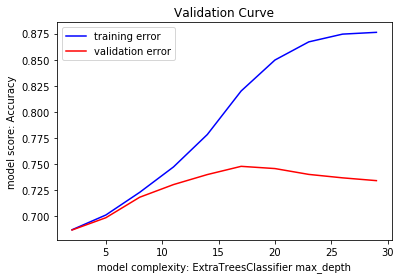

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from scipy.stats import randint, uniform

pipeline=make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    SelectKBest(),
    ExtraTreesClassifier()

) 
depth=range(2,30,3) 
param_distributions={
        'simpleimputer__strategy':['mean','median'],
        'selectkbest__k': range(1, len(train_x.columns)+1),
        'extratreesclassifier__max_depth':depth,
        'extratreesclassifier__max_features': uniform(0,1)
}

train_scores, val_scores = validation_curve(
    pipeline, train_x, train_y,
    param_name='extratreesclassifier__max_depth',
    param_range=range(2,30,3), scoring='accuracy',
    cv=3,
    n_jobs=-1
  

)
plt.plot(depth, np.mean(train_scores, axis=1), color='blue', label='training error')
plt.plot(depth, np.mean(val_scores, axis=1), color='red', label='validation error')
plt.title('Validation Curve')
plt.xlabel('model complexity: ExtraTreesClassifier max_depth')
plt.ylabel('model score: Accuracy')

plt.legend(); #17 or 18 is our best fit.

In [43]:
pipeline=make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    SelectKBest(),
    RandomForestClassifier()

) 
depth=range(10,30,5) 
param_distributions={
        'simpleimputer__strategy':['mean','median'],
        'selectkbest__k': range(30, len(train_x.columns)),
        'randomforestclassifier__max_depth':depth,
        
}

search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_distributions, 
    n_iter=100, 
    cv=5, 
    scoring='accuracy', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)

search.fit(train_x, train_y)



Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   35.7s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   51.3s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  8

ValueError: Invalid parameter extratreesclassifier for estimator Pipeline(memory=None,
     steps=[('ordinalencoder', OrdinalEncoder(cols=None, drop_invariant=False, handle_unknown='impute',
        impute_missing=True, mapping=None, return_df=True, verbose=0)), ('simpleimputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan, strategy='mean',
       verbose=0)), ('selectkbes...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]). Check the list of available parameters with `estimator.get_params().keys()`.

In [47]:
print("Best Hyperperameters", search.best_params_)
print("Cross validation accuracy", search.best_score_)


Best Hyperperameters {'simpleimputer__strategy': 'mean', 'selectkbest__k': 34, 'randomforestclassifier__max_depth': 20}
Cross validation accuracy 0.7914478114478114


Best Hyperperameters {'randomforestclassifier__max_depth': 20, 'randomforestclassifier__max_features': 0.2697913598431557, 'selectkbest__k': 33, 'simpleimputer__strategy': 'mean'}
Cross validation accuracy 0.7892255892255893

In [50]:
results=pd.DataFrame(search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_simpleimputer__strategy,param_selectkbest__k,param_randomforestclassifier__max_depth,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.619744,0.182049,0.493774,0.015340,mean,38,21,"{'simpleimputer__strategy': 'mean', 'selectkbe...",0.777915,0.791943,...,0.784691,0.004445,78,0.949325,0.951289,0.957518,0.950226,0.956680,0.953008,0.003408
1,4.536158,0.104687,0.529449,0.015119,median,40,20,"{'simpleimputer__strategy': 'median', 'selectk...",0.781955,0.794299,...,0.786914,0.004039,43,0.938747,0.948483,0.947445,0.950478,0.948965,0.946824,0.004155
2,4.512257,0.178875,0.532015,0.009846,median,43,18,"{'simpleimputer__strategy': 'median', 'selectk...",0.784424,0.788239,...,0.786779,0.001540,46,0.917562,0.927664,0.921126,0.918661,0.920291,0.921061,0.003527
3,4.413463,0.040377,0.541752,0.019198,median,39,21,"{'simpleimputer__strategy': 'median', 'selectk...",0.787566,0.784873,...,0.785791,0.001121,66,0.949830,0.953955,0.957687,0.956090,0.956877,0.954888,0.002817
4,4.407448,0.122330,0.543203,0.016223,median,38,23,"{'simpleimputer__strategy': 'median', 'selectk...",0.777915,0.784648,...,0.781235,0.002358,100,0.962429,0.968181,0.970173,0.965545,0.968492,0.966964,0.002709
5,3.807020,0.136344,0.551015,0.028082,mean,32,19,"{'simpleimputer__strategy': 'mean', 'selectkbe...",0.788464,0.793850,...,0.790101,0.001929,6,0.915654,0.923511,0.928000,0.931540,0.924976,0.924736,0.005310
6,4.276196,0.076805,0.534697,0.009830,mean,42,24,"{'simpleimputer__strategy': 'mean', 'selectkbe...",0.780720,0.783863,...,0.782918,0.003613,95,0.970257,0.975813,0.977553,0.975562,0.975983,0.975034,0.002488
7,4.026540,0.093005,0.536502,0.010497,median,31,19,"{'simpleimputer__strategy': 'median', 'selectk...",0.787790,0.791718,...,0.788799,0.002206,12,0.911417,0.923651,0.927579,0.928229,0.922591,0.922694,0.006043
8,4.535480,0.072411,0.537862,0.001967,median,42,20,"{'simpleimputer__strategy': 'median', 'selectk...",0.779374,0.790933,...,0.787452,0.004221,34,0.945032,0.943573,0.950728,0.944979,0.949891,0.946841,0.002892
9,4.136824,0.121963,0.541445,0.005696,mean,39,21,"{'simpleimputer__strategy': 'mean', 'selectkbe...",0.779374,0.782179,...,0.784489,0.003415,79,0.940935,0.954713,0.956312,0.957016,0.956175,0.953030,0.006094


In [45]:
#first_results=results.sort_values(by='rank_test_score').copy()

In [54]:
first_results.params.head()

79    {'randomforestclassifier__max_depth': 20, 'ran...
83    {'randomforestclassifier__max_depth': 17, 'ran...
94    {'randomforestclassifier__max_depth': 14, 'ran...
12    {'randomforestclassifier__max_depth': 20, 'ran...
19    {'randomforestclassifier__max_depth': 23, 'ran...
Name: params, dtype: object

In [64]:
pipeline=make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    SelectKBest(),
    RandomForestClassifier()

) 
for x in results.params.head(10):
    print(x)
    pipeline.set_params(dict(x))
    pipeline.train(train_x, train_y)
    pipeline.score(val_x,val_y)
    print(x,pipeline.score(val_x,val_y))

{'simpleimputer__strategy': 'mean', 'selectkbest__k': 38, 'randomforestclassifier__max_depth': 21}


TypeError: set_params() takes 1 positional argument but 2 were given

In [65]:
pipeline.get_params

<bound method Pipeline.get_params of Pipeline(memory=None,
     steps=[('ordinalencoder', OrdinalEncoder(cols=None, drop_invariant=False, handle_unknown='impute',
        impute_missing=True, mapping=None, return_df=True, verbose=0)), ('simpleimputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan, strategy='mean',
       verbose=0)), ('selectkbes...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])>